# Load libraries

In [1]:
# import [package name] as [name abbr.]
# python 處理數字跟 tensor 運算的主要套件
import numpy as np
# google 的 NN coding 套件
import tensorflow as tf

# 有可能會出現警告，但是可以不用理他
# c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36:
# FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating`
# is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
# from ._conv import register_converters as _register_converters

import matplotlib.pyplot as plt

# Load Dataset

In [2]:
exec(open("00_readingInput.py").read())
feature_dim = X_train.shape[1]
classes = 5

Training data (1652, 200)
Training label (1652,)
Testing data (184, 200)
Testing label (184,)


In [3]:
# Define Model Input (x) and Output (y_),  y_ = f(x)
x = tf.placeholder(tf.float32, [None, X_train.shape[1]])
y_ = tf.placeholder(tf.int32, [None])
y_one = tf.one_hot(y_,classes)

#  Define Your Model Here

In [4]:
# learning rate 0.1
lr1_h1 = tf.layers.dense(x,128,activation=None)
lr1_h1_act = tf.nn.sigmoid(lr1_h1)
lr1_h2 = tf.layers.dense(lr1_h1_act,256,activation=None)
lr1_h2_act = tf.nn.sigmoid(lr1_h2)
lr1_y = tf.layers.dense(lr1_h2_act,classes,activation=None)

lr1_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_one, logits=lr1_y))
lr1_train_step = tf.train.GradientDescentOptimizer(0.1).minimize(lr1_loss)

# Accuracy of the Model
lr1_y_pred = tf.argmax(tf.nn.softmax(lr1_y), 1, output_type=tf.int32)
lr1_correct = tf.equal(lr1_y_pred, y_)
lr1_accuracy = tf.reduce_mean(tf.cast(lr1_correct, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [5]:
# learning rate 0.01
lr01_h1 = tf.layers.dense(x,128,activation=None)
lr01_h1_act = tf.nn.sigmoid(lr01_h1)
lr01_h2 = tf.layers.dense(lr01_h1_act,256,activation=None)
lr01_h2_act = tf.nn.sigmoid(lr01_h2)
lr01_y = tf.layers.dense(lr01_h2_act,classes,activation=None)

lr01_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_one, logits=lr01_y))
lr01_train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lr01_loss)

# Accuracy of the Model
lr01_y_pred = tf.argmax(tf.nn.softmax(lr01_y), 1, output_type=tf.int32)
lr01_correct = tf.equal(lr01_y_pred, y_)
lr01_accuracy = tf.reduce_mean(tf.cast(lr01_correct, tf.float32))

In [6]:
# learning rate 0.001
lr001_h1 = tf.layers.dense(x,128,activation=None)
lr001_h1_act = tf.nn.sigmoid(lr001_h1)
lr001_h2 = tf.layers.dense(lr001_h1_act,256,activation=None)
lr001_h2_act = tf.nn.sigmoid(lr001_h2)
lr001_y = tf.layers.dense(lr001_h2_act,classes,activation=None)

lr001_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_one, logits=lr001_y))
lr001_train_step = tf.train.GradientDescentOptimizer(0.001).minimize(lr001_loss)

# Accuracy of the Model
lr001_y_pred = tf.argmax(tf.nn.softmax(lr001_y), 1, output_type=tf.int32)
lr001_correct = tf.equal(lr001_y_pred, y_)
lr001_accuracy = tf.reduce_mean(tf.cast(lr001_correct, tf.float32))

In [7]:
# initialize the models
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Training & Evaluation

In [8]:
epoch = 30
batch_size = 16
get_batches = gen_batches(X_train, Y_train, batch_size)
batches_in_a_epoch = int(X_train.shape[0]/batch_size)

In [9]:
# Train Model for 1000 steps
lr1_hist_train_acc = []
lr1_hist_valid_acc = []
lr01_hist_train_acc = []
lr01_hist_valid_acc = []
lr001_hist_train_acc = []
lr001_hist_valid_acc = []
lr1_hist_train_loss = []
lr1_hist_valid_loss = []
lr01_hist_train_loss = []
lr01_hist_valid_loss = []
lr001_hist_train_loss = []
lr001_hist_valid_loss = []
for step in range(epoch*batches_in_a_epoch):
    batch_xs, batch_ys = next(get_batches)
    sess.run(lr1_train_step, feed_dict={x: batch_xs, y_: batch_ys})
    sess.run(lr01_train_step, feed_dict={x: batch_xs, y_: batch_ys})
    sess.run(lr001_train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if (step % batches_in_a_epoch == 0):
        # trainin and validation evaluation
         # lr = 0.1
        train_loss, train_acc = sess.run([lr1_loss,lr1_accuracy], feed_dict={x: X_train, y_: Y_train})
        valid_loss, valid_acc = sess.run([lr1_loss,lr1_accuracy], feed_dict={x: X_test,  y_: Y_test})
        lr1_hist_train_acc.append(train_acc)
        lr1_hist_valid_acc.append(valid_acc)
        lr1_hist_train_loss.append(train_loss)
        lr1_hist_valid_loss.append(valid_loss)
        #print("[lr=0.1] Accuracy: [T] %.4f / [V] %.4f" % (train_acc,valid_acc))
        # lr = 0.01
        train_loss, train_acc = sess.run([lr01_loss,lr01_accuracy], feed_dict={x: X_train, y_: Y_train})
        valid_loss, valid_acc = sess.run([lr01_loss,lr01_accuracy], feed_dict={x: X_test,  y_: Y_test})
        lr01_hist_train_acc.append(train_acc)
        lr01_hist_valid_acc.append(valid_acc)
        lr01_hist_train_loss.append(train_loss)
        lr01_hist_valid_loss.append(valid_loss)
        #print("[lr=0.01] Accuracy: [T] %.4f / [V] %.4f" % (train_acc,valid_acc))
        # lr = 0.001
        train_loss, train_acc = sess.run([lr001_loss,lr001_accuracy], feed_dict={x: X_train, y_: Y_train})
        valid_loss, valid_acc = sess.run([lr001_loss,lr001_accuracy], feed_dict={x: X_test,  y_: Y_test})
        lr001_hist_train_acc.append(train_acc)
        lr001_hist_valid_acc.append(valid_acc)
        lr001_hist_train_loss.append(train_loss)
        lr001_hist_valid_loss.append(valid_loss)
        #print("[lr=0.001] Accuracy: [T] %.4f / [V] %.4f" % (train_acc,valid_acc))
sess.close()

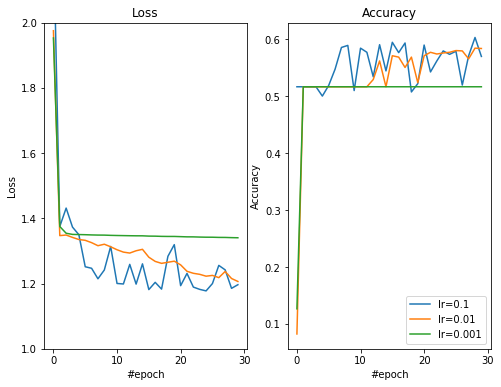

In [10]:
plt.figure(0,figsize=(8,6))
plt.subplot(121)
x = [x for x in range(len(lr1_hist_train_loss))]
lr1_line, = plt.plot(x, lr1_hist_train_loss, label='lr=0.1')
lr01_line, = plt.plot(x, lr01_hist_train_loss, label='lr=0.01')
lr001_line, = plt.plot(x, lr001_hist_train_loss, label='lr=0.001')
plt.ylim([1,2])
plt.xlabel('#epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.subplot(122)
x = [x for x in range(len(lr1_hist_train_acc))]
lr1_line, = plt.plot(x, lr1_hist_train_acc, label='lr=0.1')
lr01_line, = plt.plot(x, lr01_hist_train_acc, label='lr=0.01')
lr001_line, = plt.plot(x, lr001_hist_train_acc, label='lr=0.001')
plt.xlabel('#epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(handles=[lr1_line,lr01_line,lr001_line], loc=4)
plt.savefig('./training_curve/ex02_LearningRate.png')
plt.show()
plt.close()